## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

Regression predicts a continuous numeric output like price or temperature, while classification predicts a discrete category or label. So predicting how much a house costs would be regression, whereas predicting what type of land mine something is classification.

2. What is a confusion table/matrix? What does it help us understand about a model's performance? 

A confusion matrix is a table where rows are the true class labels and columns are the predicted ones. The diagonal entries are correct predictions and everything off-diagonal is a mistake. It's useful because a single accuracy number does not tell the whole story, and 

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

Accuracy is just the fraction of predictions that were correct. The problem is it can be misleading when classes are imbalanced — if 90% of data is one class, a model that always predicts that class looks 90% accurate but is completely useless. It also hides where the errors are happening, which matters a lot in something like mine detection where getting the wrong type could be deadly.

4. What does the root mean squared error quantify about a particular model?

RMSE measures how far off predictions are from the true values on average, in the same units as the outcome. It squares errors before averaging so big mistakes are penalized more. Lower RMSE means the model's predictions are closer to reality.

5. What are overfitting and underfitting? 

Overfitting is when the model memorizes the training data too well, including the noise, so it performs great on training data but poorly on new data. Underfitting is when the model is too simple and misses real patterns in both training and test data. In kNN, small k tends to overfit and large k tends to underfit.

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

If we picked k based on training data alone we'd always pick k=1 since it perfectly memorizes training samples. By evaluating on a held-out test set the model hasn't seen, we can see which k actually generalizes. The k with best test performance is the one most likely to work on real new data, which protects against overfitting.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Predicting a class label is simple and easy to act on — you get one clear answer. But it hides how confident the model actually was, which matters a lot in high-stakes situations. Predicting a probability distribution gives you that uncertainty, so you can be more cautious when the model is split between classes. The downside is it's harder to interpret and you still need to decide at what threshold to actually take action.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/land_mines.csv', encoding = 'latin1')
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


(338, 4)
mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


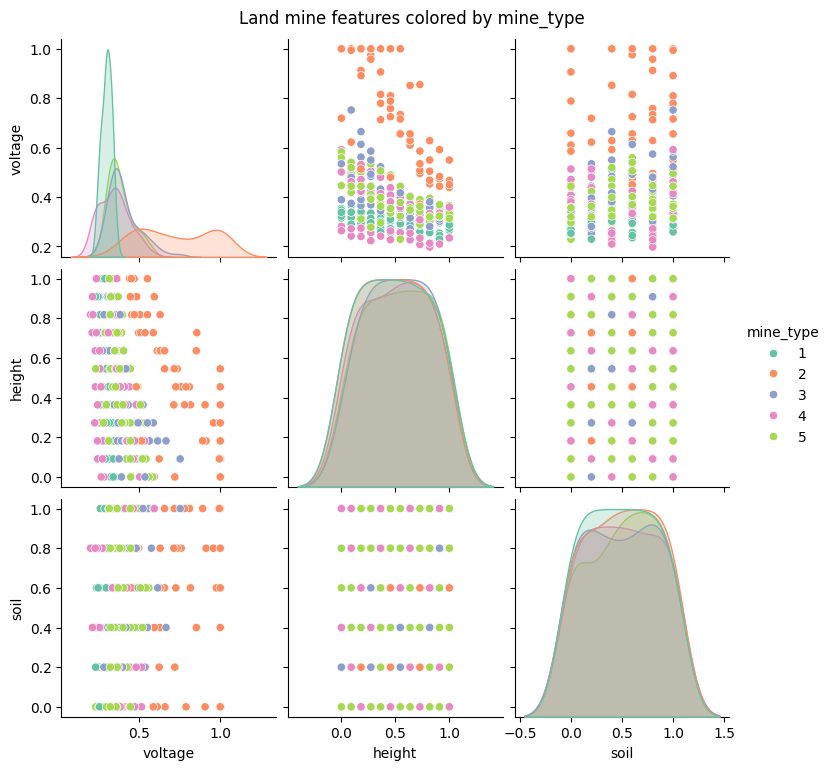

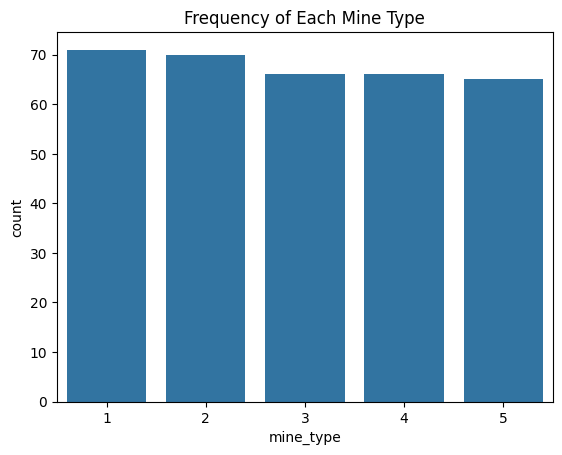

In [22]:
print(df.shape)
print(df["mine_type"].value_counts())
print(df.describe())
sns.pairplot(df, hue="mine_type", vars=["voltage", "height", "soil"], diag_kind="kde", palette="Set2")
plt.suptitle("Land mine features colored by mine_type", y=1.02)
plt.show()
sns.countplot(data=df, x="mine_type")
plt.title("Frequency of Each Mine Type")
plt.show()

In [101]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df['mine_type']  # Set our outcome/target
ctrl_list = ["voltage", "height", "soil"]  # Set our covariates/features
x = df.loc[:, ctrl_list]  # Set our covariates/features
scaler = MinMaxScaler()
u = pd.DataFrame(scaler.fit_transform(x), columns=ctrl_list)  # Scale our variables

X_train, X_test, y_train, y_test = train_test_split(u, y, test_size=0.5, stratify=y, random_state= 123)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(169, 3) (169, 3)
mine_type
2    0.207101
1    0.207101
5    0.195266
3    0.195266
4    0.195266
Name: proportion, dtype: float64
mine_type
1    0.213018
2    0.207101
3    0.195266
4    0.195266
5    0.189349
Name: proportion, dtype: float64


Test accuracy for 4 neighbors is 0.39644970414201186; train accuracy for 4 neighbors is 0.7041420118343196
Test accuracy for 5 neighbors is 0.39644970414201186; train accuracy for 5 neighbors is 0.6568047337278107
Test accuracy for 6 neighbors is 0.40828402366863903; train accuracy for 6 neighbors is 0.621301775147929
Test accuracy for 7 neighbors is 0.3905325443786982; train accuracy for 7 neighbors is 0.6153846153846154
Test accuracy for 8 neighbors is 0.33727810650887574; train accuracy for 8 neighbors is 0.5739644970414202
Test accuracy for 9 neighbors is 0.33727810650887574; train accuracy for 9 neighbors is 0.5443786982248521
Test accuracy for 10 neighbors is 0.3609467455621302; train accuracy for 10 neighbors is 0.5680473372781065
Test accuracy for 11 neighbors is 0.3727810650887574; train accuracy for 11 neighbors is 0.5502958579881657
Test accuracy for 12 neighbors is 0.35502958579881655; train accuracy for 12 neighbors is 0.5443786982248521
Test accuracy for 13 neighbors is 0

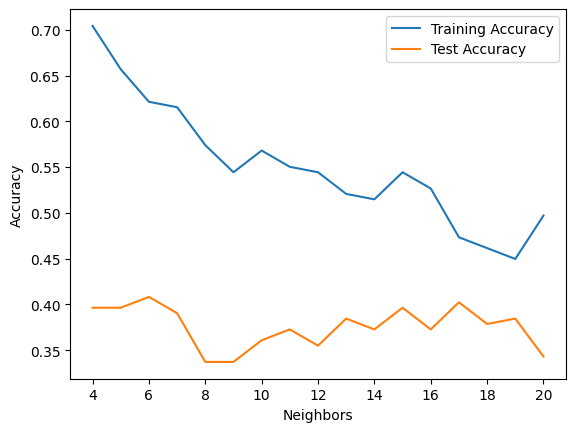

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

k_grid = np.array([(k + 1) for k in range(3, 20)])  # 1,3,5,...,51
test_accuracies = []
train_accuracies = []
for k in k_grid:
     # For each candidate value of k...
    model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model = model.fit(X_train,y_train) # Fit the model
    y_hat = model.predict(X_test) # Predict values
    test_acc = model.score(X_test,y_test) # Compute test accuracy
    train_acc = model.score(X_train,y_train) # Compute trainin accuracy
    print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc) # Save test results
    train_accuracies.append(train_acc) # Save training results
sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

In [106]:
is_optimal = test_accuracies == np.max(test_accuracies) # Maximizer Boolean
optimal_indices = np.where( is_optimal ) # Indices that maximize accuracy
k_optimal = k_grid[ optimal_indices ] # Values of k that maximize accuracy
print(k_optimal)

[6]


I swept odd values of k from 3 up to the size of the training set and plotted test accuracy vs. k. I selected the k that maximized test set accuracy.

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
k = 3
# Create a fitted model instance:
model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
model = model.fit(X_train, y_train) # Fit the model
# Make predictions:
y_hat = model.predict(X_test) # Hard prediction
print("Accuracy:", accuracy_score(y_test, y_hat))
print(pd.crosstab(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))

Accuracy: 0.3905325443786982
col_0       1   2   3  4  5
mine_type                  
1          20   0   9  4  3
2           0  32   0  3  0
3          11   0   9  5  8
4          17   3   5  3  5
5          14   0  13  3  2
[[20  0  9  4  3]
 [ 0 32  0  3  0]
 [11  0  9  5  8]
 [17  3  5  3  5]
 [14  0 13  3  2]]


Overall accuracy is  around 39%. The model performs best on mine types 1 and 2, which have the most well-separated clusters in the pairplot. There is a signficant drop for the other mine types- performance is weakest on types 3, 4, and 5, which overlap heavily as seen in the pairplot. 

I would advise using this model as a screening tool rather than a definitive classifier. I would recommend treating the model's output as "uncertain" and defaulting to the safest removal procedure for ambiguous mines. Human lives ultimately matter more than convenience, and a false prediction that leads to the wrong disarming technique is more dangerous than simply flagging a mine as "unknown type". 39% accuracy overall is rather poor, and even Type 2 which was the best performer was 80%, which is okay but not a guaruntee. 

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)